In [1]:
####Geopy instructions are located at https://pypi.python.org/pypi/geopy ####
####DBSCAN instructions are located at 
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb
from geopy.distance import great_circle


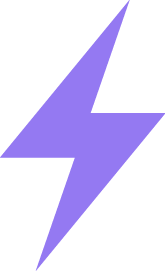

Running local mode, some functionality limited.



In [2]:
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)

In [3]:
def dbscanner(x, y, a, b):
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps = a, min_samples = b)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
    import numpy as np
    core_samples = np.zeros_like(labels, dtype = bool)  
    core_samples[dbscan.core_sample_indices_] = True 
    print(core_samples)
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)

    for (label, color) in zip(unique_labels, colors):
        class_member_mask = (labels == label)
        n = X.loc[class_member_mask & core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)

        n = X.loc[class_member_mask & ~core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

    plt.show()

In [4]:
northamerica = pd.read_csv('northamericacomplete.csv')

In [5]:
northamerica.columns

Index(['Name', 'State/Estado/Province', 'Country',
       'Distance to closest larger city (KM)', '60 cities Region 190 km',
       '60 cities Region 380 km', '60 cities Region 475 km',
       '100 cities Region 190 km', 'Population Rank', 'Rank Power',
       'Population', 'Population PSAPower', 'Rolling population total',
       'Rolling Population Percent', 'Priority Score',
       'Estimated cost (http://www.worldbank.org/en/news/press-release/2014/07/10/cost-of-high-speed-rail-in-china-one-third-lower-than-in-other-countries)',
       'Ticket price',
       'Estimated revenue (0.1% of city rides the train per month)',
       'Payoff time in years',
       'Politics 1 for Democrat, -1 for Republican, 2 for swing',
       'Governor party D+ R-',
       'Highest-ranked university ranking (US News) (200=0)',
       'GDP per capita of State', 'Closest National Park (KM)',
       'Distance from a foreign country (KM)', 'Score',
       'If part of a larger city's transportation, city nam

In [6]:
df = northamerica[['Name','State/Estado/Province','Country', 'Longitude', 'Latitude','Population']]
df = df.dropna()
df['Longitude'] = df['Longitude'] * -1

In [7]:
df.head()

Name      State/Estado/Province Country  Longitude  \
0            St. John's  Newfoundland and Labrador  Canada    -52.700   
1  Conception Bay South  Newfoundland and Labrador  Canada    -53.000   
2           Cape Breton                Nova Scotia  Canada    -60.750   
3         Charlottetown       Prince Edward Island  Canada    -63.100   
4               Halifax                Nova Scotia  Canada    -63.506   

   Latitude  Population  
0    47.550      205955  
1    47.500       26199  
2    46.150       98722  
3    46.250       69325  
4    44.515      403390

In [8]:
df.shape

(693, 6)

for row in df:
    if df['Population'] < 'Population':
        print

In [9]:
df['Country'].value_counts()

United States           560
Canada                   61
Mexico                   58
Honduras                  4
Nicaragua                 3
El Salvador               2
Guatemala                 2
Panama                    1
Costa Rica                1
Canada/United States      1
Name: Country, dtype: int64

In [10]:
df.dtypes

Name                      object
State/Estado/Province     object
Country                   object
Longitude                float64
Latitude                 float64
Population                 int64
dtype: object

In [11]:
df['Population'].sum() * 100 / 565265000

71.19689720750445

In [12]:
usa = df[df['Country'] == 'United States']

In [13]:
usa['Population'].sum() * 100 / 320000000

91.9355203125

In [14]:
canada = df[df['Country'] == 'Canada']
canada['Population'].sum() * 100 / 35000000

76.35025142857143

In [15]:
mexico = df[df['Country'] == 'Mexico']
mexico['Population'].sum() * 100 / 119530000

54.69311553584874

In [16]:
X = df[['Longitude', 'Latitude']]
x = df['Longitude']
y = df['Latitude']
labels = df['Name']
lgn.scatter(x, y, labels = df['Name'])

Silhouette Coefficient: -0.054
Estimated number of clusters: 15
Homogeneity: 0.160
Completeness: 0.926
V-measure: 0.273
[ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  Tr

/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


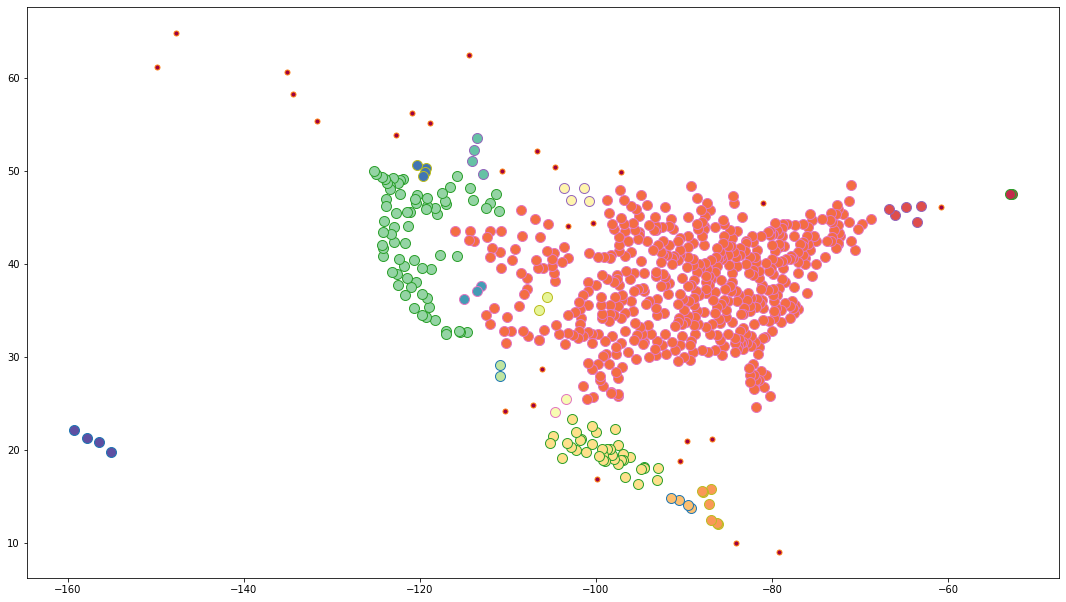

In [17]:
# 2 is the equivalent of 190 km, which is less than 1.5 hours on a high speed train.
dbscanner(y, x, 2, 2)

Silhouette Coefficient: 0.264
Estimated number of clusters: 5
Homogeneity: 0.025
Completeness: 0.975
V-measure: 0.049
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True

/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


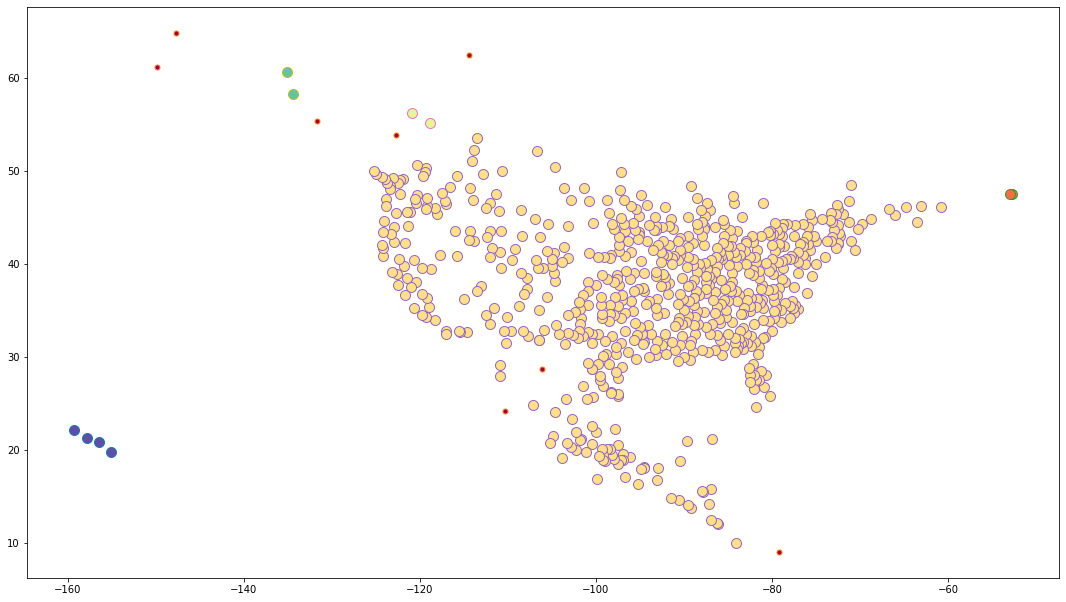

In [18]:
# 2 is the equivalent of 190 km, which is less than 1.5 hours on a high speed train.
dbscanner(y, x, 3, 2)

In [19]:
largecities = df
largecities = largecities.loc[largecities['Population'] >= 500000]
largecities.shape

(154, 6)

In [20]:
X = largecities[['Longitude', 'Latitude']]
x = largecities['Longitude']
y = largecities['Latitude']
labels = largecities['Name']
lgn.scatter(x, y, labels)

Silhouette Coefficient: 0.095
Estimated number of clusters: 18
Homogeneity: 0.477
Completeness: 0.944
V-measure: 0.634
[ True  True False  True  True  True False  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True False  True  True  True  True
 False  True  True False  True False False  True  True  True  True  True
 False  True  True False False False False  True False  True False False
  True False False  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True False  True False  True False  True False
  True False False False False  True False  True  True False  True  True
  Tru

/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


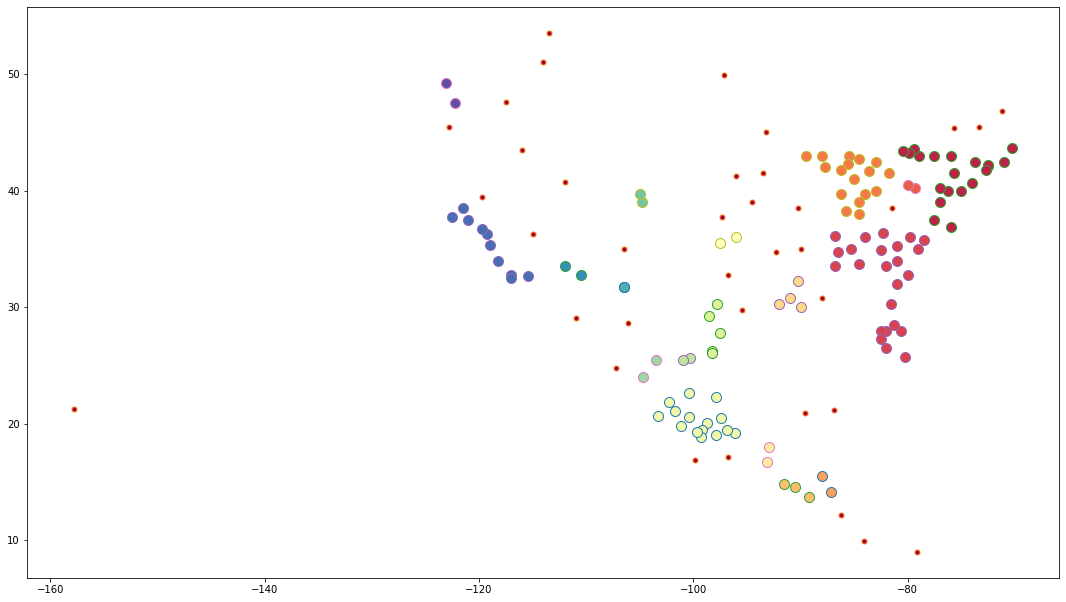

In [21]:
dbscanner(y, x, 2, 2)

Silhouette Coefficient: 0.004
Estimated number of clusters: 7
Homogeneity: 0.186
Completeness: 0.990
V-measure: 0.313
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True False  True  True False  True  True
  True

/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


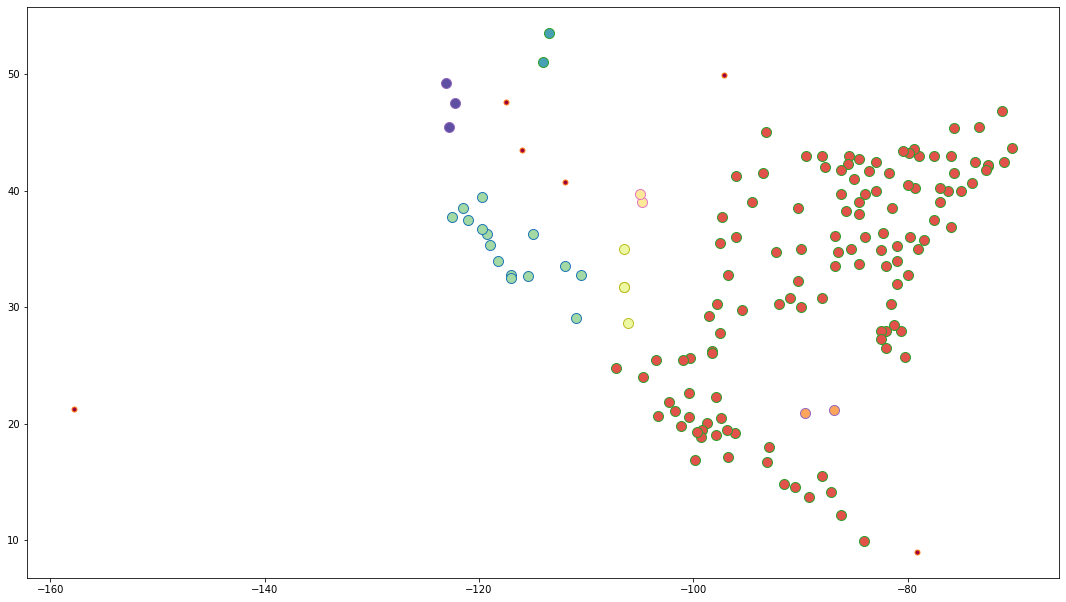

In [22]:
dbscanner(y, x, 4, 2)

In [23]:
million = df.loc[df['Population'] >= 1000000]

In [24]:
X = million[['Longitude', 'Latitude']]
x = million['Longitude']
y = million['Latitude']
labels = million['Name']
lgn.scatter(x, y, labels)

Silhouette Coefficient: 0.123
Estimated number of clusters: 17
Homogeneity: 0.544
Completeness: 0.943
V-measure: 0.690
[ True  True False  True  True  True False  True  True  True  True  True
  True  True False  True  True False False  True  True  True  True  True
  True  True  True  True  True False False  True False  True  True False
 False False  True  True  True  True  True False False False  True False
 False False  True False  True  True  True  True  True  True False False
  True  True  True  True False False  True False  True  True  True False
 False False False  True  True  True False  True  True  True False  True]


/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


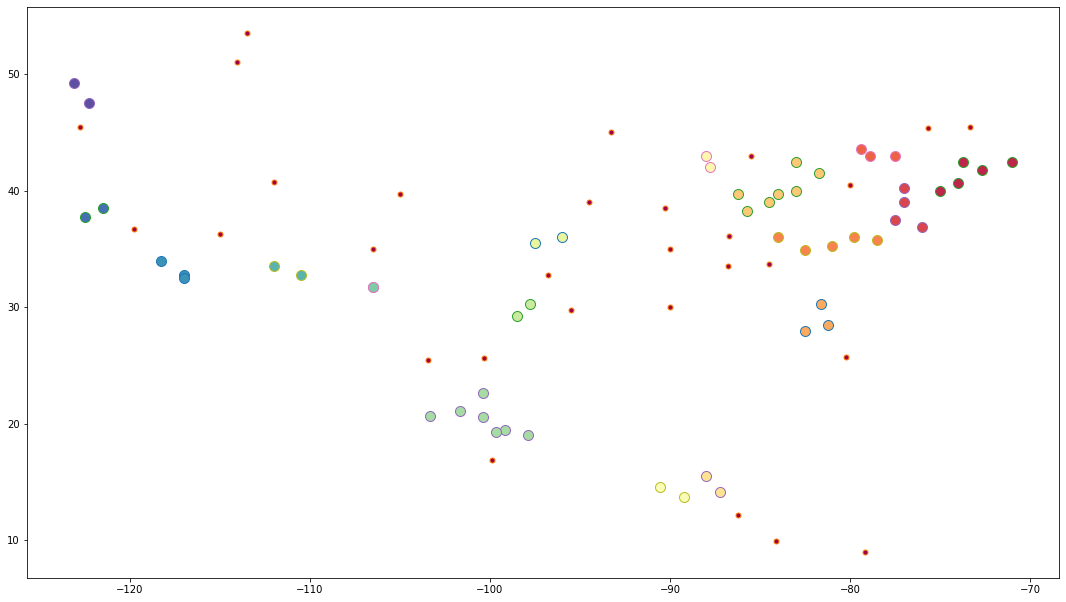

In [25]:
# 2 with dbscanner is the equivalent of 190 km, less than a 1 hour ride on a high speed train.
dbscanner(y, x, 2, 2)

Silhouette Coefficient: 0.406
Estimated number of clusters: 10
Homogeneity: 0.445
Completeness: 0.958
V-measure: 0.608
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True]


/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


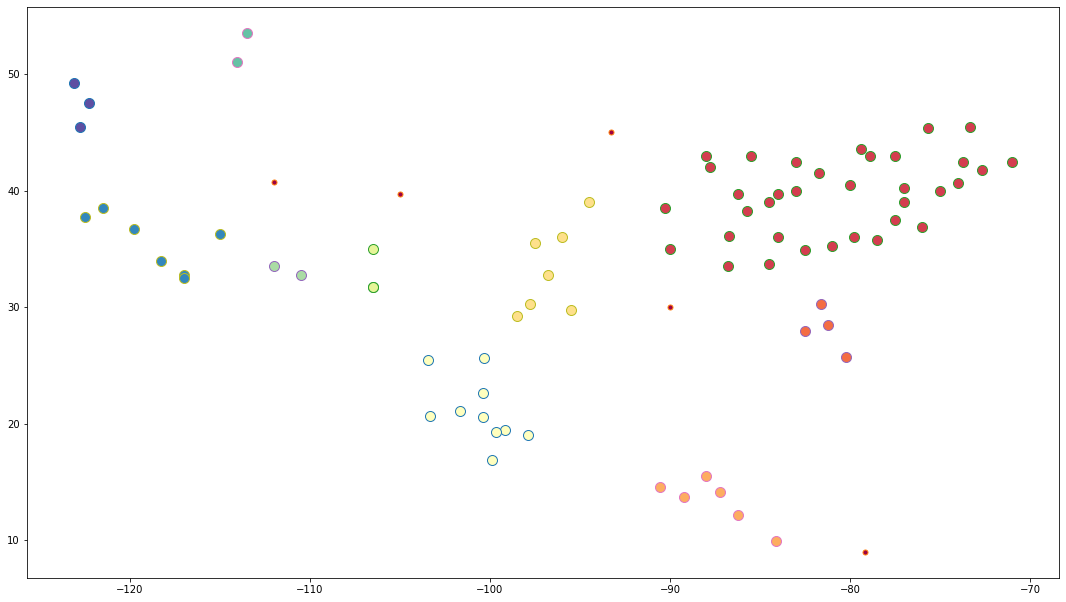

In [26]:
# 4 with dbscanner is the equivalent of 380 km, less than 2 hours on a high speed train.
dbscanner(y, x, 4, 2)

Silhouette Coefficient: 0.393
Estimated number of clusters: 5
Homogeneity: 0.223
Completeness: 0.966
V-measure: 0.363
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


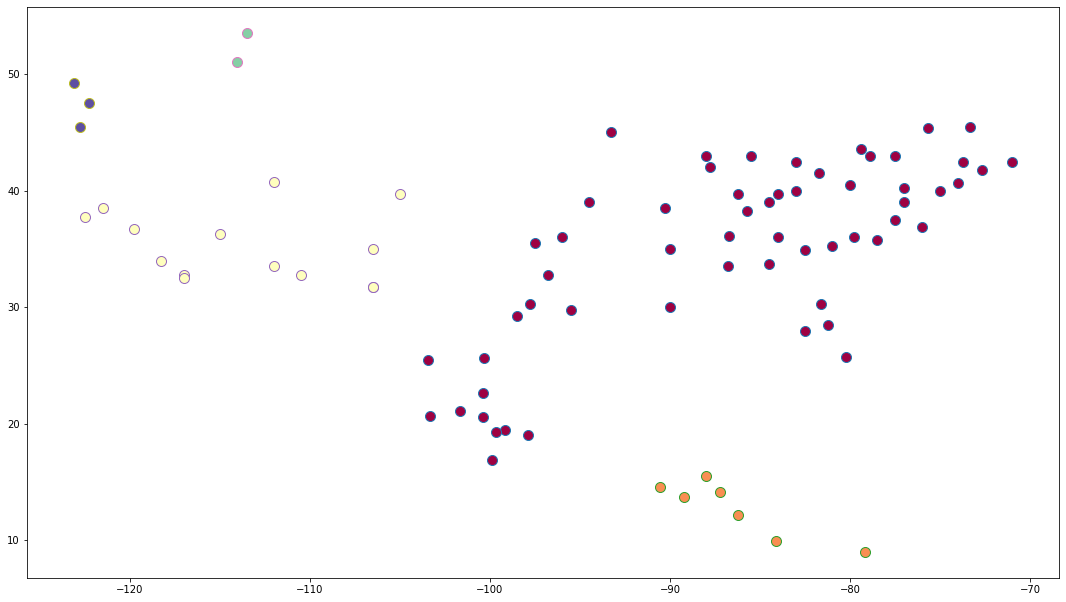

In [27]:
# 6 with dbscanner is the equivalent of 570 km, less than 3 hours on a high speed train.
dbscanner(y, x, 6, 2)

In [28]:
usa = million[million['Country'] == 'United States']
usa['Population'].sum() * 100 / 320000000

65.6850784375

In [29]:
million = df.loc[df['Population'] >= 2350000]
usa = million[million['Country'] == 'United States']
usa['Population'].sum() * 100 / 320000000

50.4131303125

In [30]:
X = million[['Longitude', 'Latitude']]
x = million['Longitude']
y = million['Latitude']
labels = million['Name']
lgn.scatter(x, y, labels)

Silhouette Coefficient: -0.038
Estimated number of clusters: 7
Homogeneity: 0.413
Completeness: 1.000
V-measure: 0.584
[False False  True  True False False False False False  True  True  True
  True False False False False False False False False  True  True False
 False False False False  True  True  True  True  True False  True]


/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


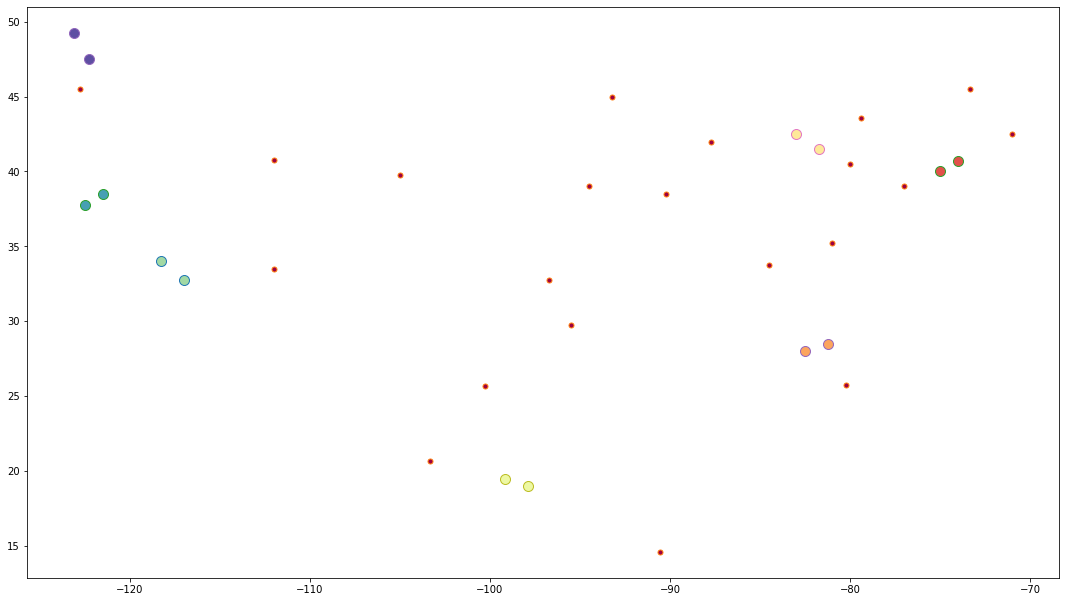

In [31]:
dbscanner(y, x, 2, 2)

Silhouette Coefficient: 0.284
Estimated number of clusters: 8
Homogeneity: 0.554
Completeness: 1.000
V-measure: 0.713
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False  True  True  True  True False
 False False False False  True  True  True  True  True  True  True]


/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


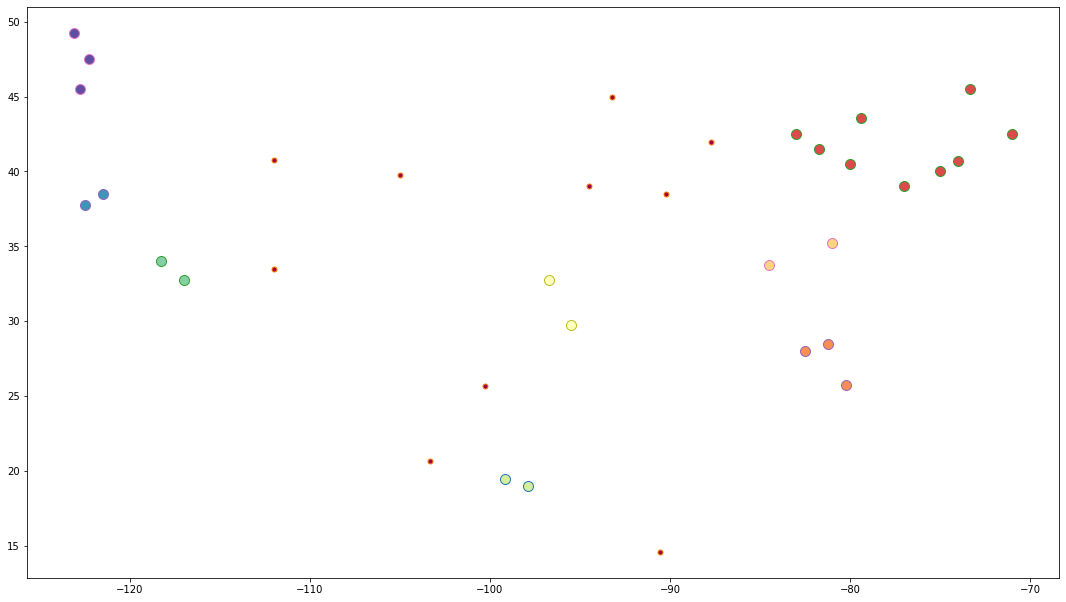

In [32]:
# 4 with dbscanner is the equivalent of 380 km, between 1 and 2 hours on a high speed train.
dbscanner(y, x, 4, 2)

Silhouette Coefficient: 0.354
Estimated number of clusters: 6
Homogeneity: 0.479
Completeness: 0.977
V-measure: 0.643
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False  True  True  True  True  True  True
  True False  True False  True  True  True  True  True  True  True]


/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


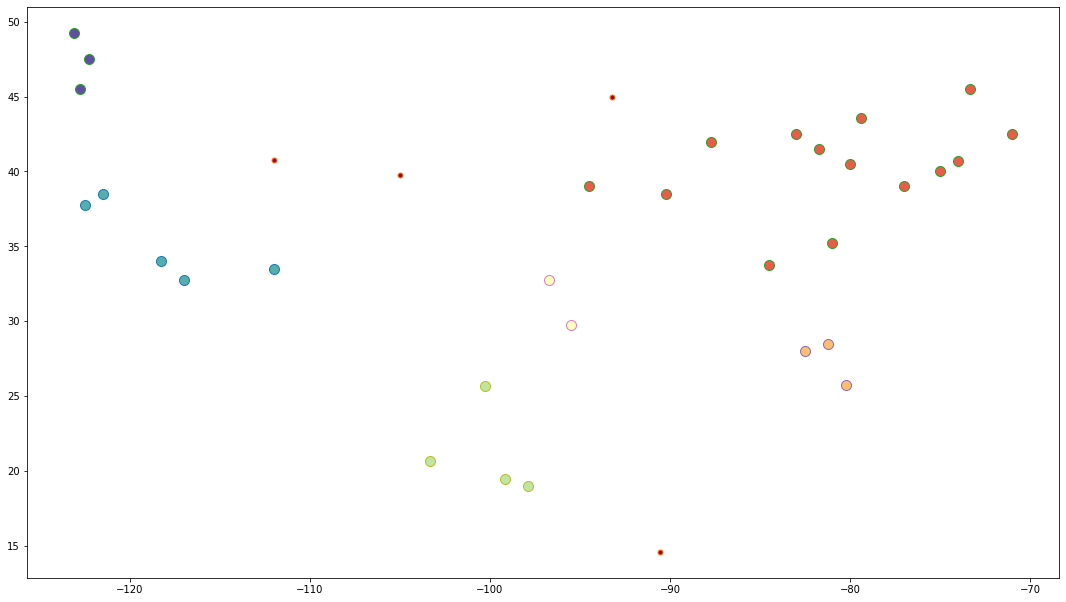

In [33]:
# 6 with dbscanner is the equivalent of 570 km, under 3 hours on a high speed train.
dbscanner(y, x, 6, 2)

In [34]:
X = usa[['Longitude', 'Latitude']]
x = usa['Longitude']
y = usa['Latitude']
labels = usa['Name']
lgn.scatter(x, y, labels)

Silhouette Coefficient: 0.356
Estimated number of clusters: 7
Homogeneity: 0.568
Completeness: 0.919
V-measure: 0.702
[ True  True  True  True  True  True  True  True  True  True  True  True
 False False False False  True  True False False False  True  True  True
  True  True  True]


/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


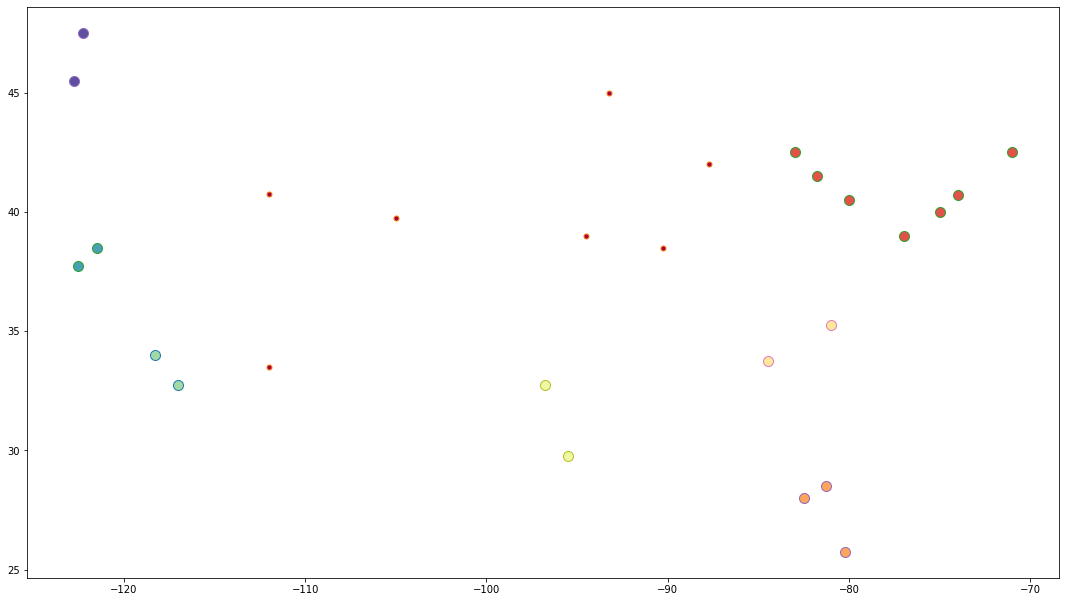

In [35]:
dbscanner(x, y, 4, 2)

Silhouette Coefficient: 0.368
Estimated number of clusters: 5
Homogeneity: 0.467
Completeness: 0.934
V-measure: 0.623
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True False  True False  True  True  True
  True  True  True]


/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


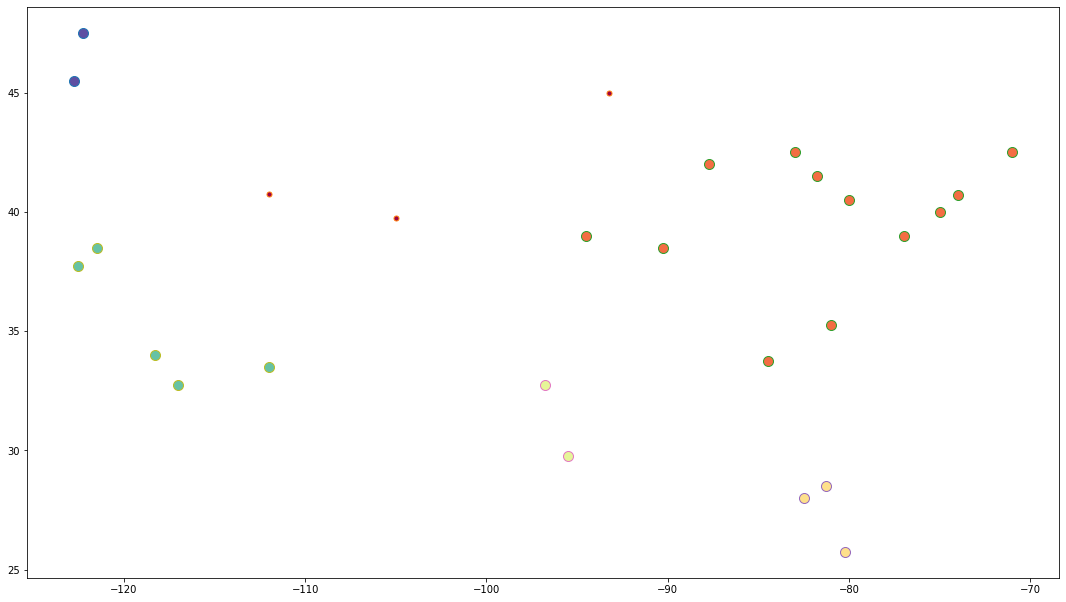

In [36]:
dbscanner(x, y, 6, 2)

In [37]:
usa = df[df['Country'] == 'United States']
usa = usa.loc[usa['Population'] >= 500000]

In [38]:
X = usa[['Longitude', 'Latitude']]
x = usa['Longitude']
y = usa['Latitude']
labels = usa['Name']
lgn.scatter(x, y, labels)

Silhouette Coefficient: 0.159
Estimated number of clusters: 10
Homogeneity: 0.436
Completeness: 0.930
V-measure: 0.594
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True False False  True  True  True False False False False
 False  True False False False  True  True  True  True  True  True  True
 False False  True  True False False False  True False  True  True  True
  True False  True  True False  True False False]


/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


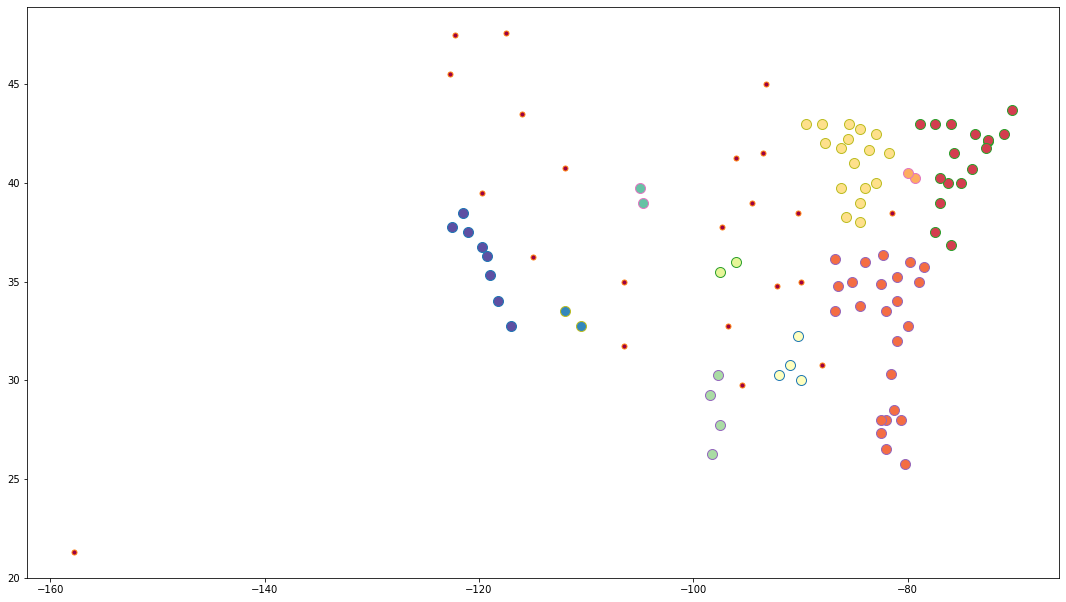

In [39]:
dbscanner(y, x, 2, 2)

Silhouette Coefficient: 0.396
Estimated number of clusters: 6
Homogeneity: 0.193
Completeness: 0.984
V-measure: 0.323
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False  True False  True  True  True
  True  True  True  True  True  True  True False]


/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


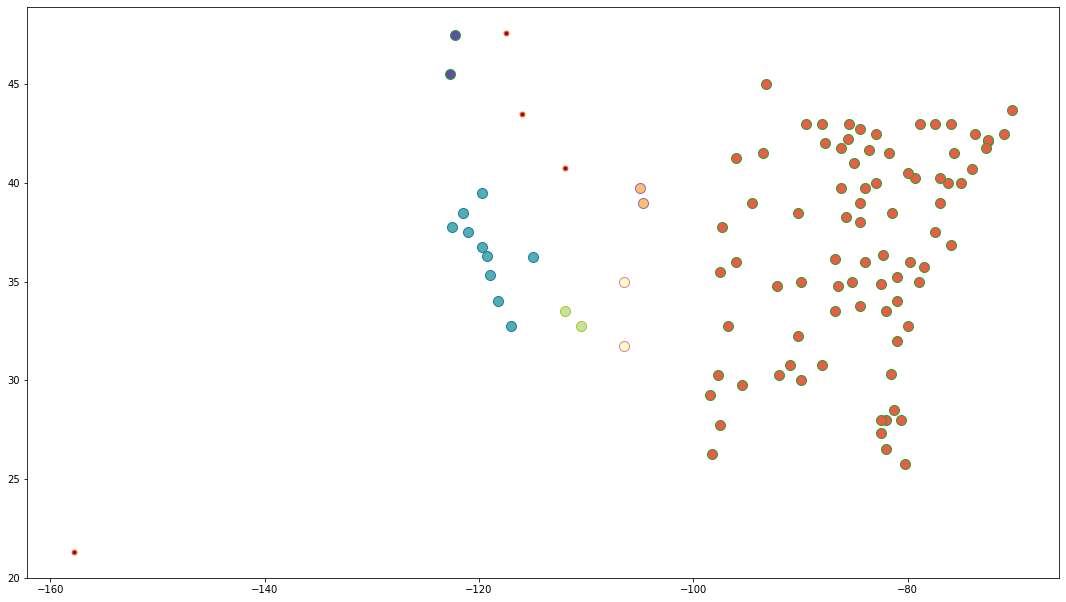

In [40]:
dbscanner(y, x, 4, 2)

In [41]:
usa.shape

(104, 6)

In [42]:
190*4

760

In [43]:
usa

Name State/Estado/Province        Country  Longitude  \
10                 Portland                 Maine  United States     -70.25   
12                   Boston         Massachusetts  United States     -71.00   
19              Springfield         Massachusetts  United States     -72.50   
20              Springfield              Missouri  United States     -72.50   
24                 Hartford           Connecticut  United States     -72.70   
..                      ...                   ...            ...        ...   
651              Sacramento            California  United States    -121.50   
657                 Seattle            Washington  United States    -122.25   
661  San Jose/San Francisco            California  United States    -122.50   
663                Portland                Oregon  United States    -122.75   
691                Honolulu                Hawaii  United States    -157.80   

     Latitude  Population  
10      43.70      625726  
12      42.50     7991371  
19      42.10      697258  
20      42.20      529141  
24      41.75     1488570  
..        ...         ...  
651     38.50     2462722  
657     47.50     4399332  
661     37.75     8370967  
663     45.50     2992924  
691     21.30      991788  

[104 rows x 6 columns]

In [44]:
pd.read_csv('uscities.csv')

Abbotsford, BC, Canada  \
0          Abbotsford, BC, Canada                     NaN   
1      Abilene, TX, United States                 3765.47   
2      Acapulco de Juárez, Mexico                 5812.03   
3             Agua Prieta, Mexico                 3165.04   
4          Aguascalientes, Mexico                 4938.21   
..                            ...                     ...   
995  Yuba City, CA, United States                 1334.40   
996       Yuma, AZ, United States                 2815.25   
997             Zacatecas, Mexico                 5486.75   
998                Zamora, Mexico                 4886.57   
999               Zapopan, Mexico                 4717.96   

     Abilene, TX, United States  Acapulco de Juárez, Mexico  \
0                       3701.12                     5689.34   
1                           NaN                     3964.73   
2                       2970.67                         NaN   
3                       1153.51                     2721.89   
4                       2185.52                     1156.29   
..                          ...                         ...   
995                     2724.09                     4206.32   
996                     1627.75                     3109.98   
997                     2075.92                     1276.70   
998                     3158.28                      875.67   
999                     2989.67                      995.29   

     Agua Prieta, Mexico  Aguascalientes, Mexico  Ajax, ON, Canada  \
0                3162.23                 4922.29           5511.80   
1                1154.57                 2190.45           2880.61   
2                2840.86                 1261.75           5840.04   
3                    NaN                 1954.84           4022.87   
4                1967.04                     NaN           5054.89   
..                   ...                     ...               ...   
995              1679.20                 3439.27           5593.46   
996               582.86                 2342.93           4497.12   
997              2300.11                  120.06           4945.29   
998              1915.39                  336.29           6027.65   
999              1746.78                  228.24           5859.04   

     Akron, OH, United States  Alafaya, FL, United States  \
0                     5234.77                     6467.52   
1                     2529.97                     2194.16   
2                     5489.40                     5153.60   
3                     3672.24                     3336.43   
4                     4704.25                     4368.45   
..                        ...                         ...   
995                   5242.82                     4907.01   
996                   4146.48                     3810.67   
997                   4594.65                     4258.85   
998                   5677.01                     5341.21   
999                   5508.40                     5172.60   

     Alameda, CA, United States  ...  Xochimilco, Mexico  \
0                       1606.67  ...             5328.77   
1                       2642.08  ...             3604.16   
2                       4243.25  ...              371.01   
3                       1596.26  ...             2361.32   
4                       3369.43  ...              795.72   
..                          ...  ...                 ...   
995                      200.54  ...             3845.75   
996                     1052.66  ...             2749.41   
997                     3200.15  ...              916.13   
998                     3317.79  ...              515.10   
999                     3149.18  ...              634.72   

     Yakima, WA, United States  Yonkers, NY, United States  \
0                       412.88                     6056.58   
1                      3354.37                     3089.95   
2                      5400.93                     6049.39   
3 